In [13]:
# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

In [1]:
tickers = ['AMZN','AAPL','WBA','NOC','BA','LMT',
           'MCD','INTC','IBM','TXN','MA','MSFT',
           'GE','AXP','PEP','KO','JNJ','TM','HMC',
           'XOM','CVX','VLO','META','BAC']

In [2]:
start_date = '2010-01-01' 
end_date = '2020-11-01'

import yfinance as yf
df = yf.download(tickers, start_date, end_date)[['Adj Close']]

[*********************100%***********************]  27 of 27 completed

3 Failed downloads:
- NAV: No timezone found, symbol may be delisted
- SNE: No timezone found, symbol may be delisted
- MSBHY: No timezone found, symbol may be delisted


In [4]:
df.head()

Adj Close                                                      \
                AAPL    AMZN        AXP         BA        BAC        CVX   
Date                                                                       
2010-01-04  6.496295  6.6950  33.437004  43.777546  12.977035  46.397545   
2010-01-05  6.507525  6.7345  33.363468  45.211334  13.398851  46.726177   
2010-01-06  6.404016  6.6125  33.902771  46.582809  13.555994  46.732052   
2010-01-07  6.392177  6.5000  34.452625  48.468559  14.002625  46.556007   
2010-01-08  6.434673  6.6760  34.428001  48.001022  13.878564  46.638153   

                                                        ...                 \
                   GE        HMC        IBM       INTC  ...       MSFT NAV   
Date                                                    ...                  
2010-01-04  68.084297  27.475611  79.247475  13.745538  ...  23.572371 NaN   
2010-01-05  68.436836  27.285515  78.290138  13.738959  ...  23.579985 NaN   
2010-01-06  68.084297  27.047918  77.781586  13.692875  ...  23.435278 NaN   
2010-01-07  71.609711  26.588531  77.512367  13.561213  ...  23.191549 NaN   
2010-01-08  73.152077  27.198399  78.290138  13.712626  ...  23.351498 NaN   

                                                                       \
                  NOC        PEP SNE         TM        TXN        VLO   
Date                                                                    
2010-01-04  38.601650  41.343437 NaN  72.314590  18.363136  10.440829   
2010-01-05  38.669563  41.843014 NaN  71.201126  18.257242  10.709294   
2010-01-06  38.818924  41.424431 NaN  72.110580  18.123112  10.977755   
2010-01-07  39.219551  41.161148 NaN  71.218124  18.179585  11.059456   
2010-01-08  39.002277  41.026138 NaN  72.892555  18.596119  10.907721   

                                  
                  WBA        XOM  
Date                              
2010-01-04  25.593069  41.319061  
2010-01-05  25.387226  41.480389  
2010-01-06  25.195099  41.838905  
2010-01-07  25.346056  41.707455  
2010-01-08  25.380363  41.540157  

[5 rows x 27 columns]

In [6]:
import pandas as pd
import numpy as np

returns = df.pct_change().mean() * (10*12)
std = df.pct_change().std() * np.sqrt((10*12))
ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]

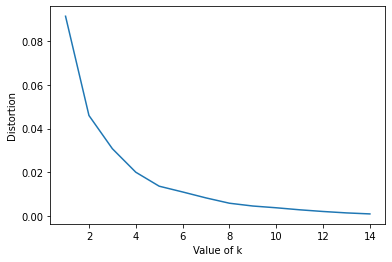

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = ret_var.values
sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1,15), sse)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

In [9]:
stdOrder = ret_var.sort_values('Standard Deviation',ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol,inplace=True)
X = ret_var.values

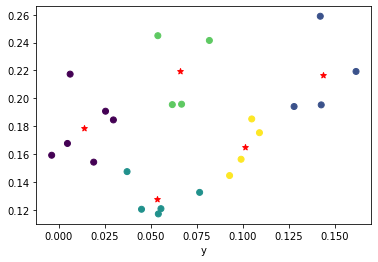

In [10]:
kmeans =KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.xlabel("y")
plt.scatter(centroids[:,0], centroids[:,1],color="red",marker="*")
plt.show()

In [11]:
stocks = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']
x_df = pd.DataFrame(X, columns = ["Returns", "Volatitity"])
closerv = pd.concat([stockClusters,x_df],axis=1)
closerv = closerv.set_index("Symbol")
closerv

,Cluster,Returns,Volatitity
Symbol,,,
"(Adj Close, AAPL)",1,0.142520,0.195328
"(Adj Close, AMZN)",1,0.161408,0.219298
"(Adj Close, AXP)",3,0.061691,0.195526
"(Adj Close, BA)",3,0.081806,0.241513
"(Adj Close, BAC)",3,0.053830,0.244936
"(Adj Close, CVX)",0,0.029708,0.184557
"(Adj Close, GE)",0,0.006226,0.217377
"(Adj Close, HMC)",0,0.004768,0.167684
"(Adj Close, IBM)",0,0.019014,0.154290


In [14]:
from sklearn import metrics
y_predkmeans = pd.DataFrame(kmeans.predict(X))
y_predkmeans = y_predkmeans.dropna()
metrics.silhouette_score(X,y_predkmeans)

0.4154576734574728

In [15]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

yfinance  : 0.2.12
numpy     : 1.23.0
matplotlib: 3.5.2
sklearn   : 1.1.1
pandas    : 1.4.3



### End.